#**GDG TASK 2**

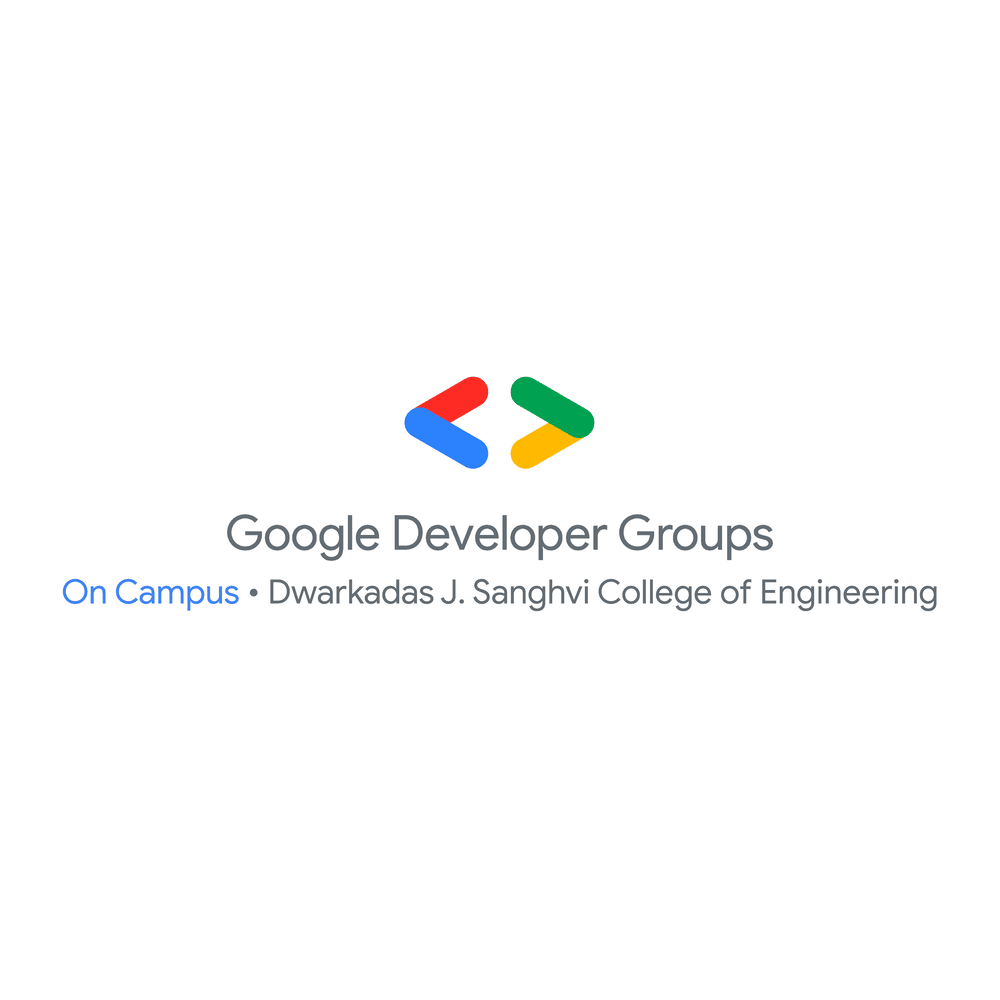

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding.

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [1]:
!pip install shap -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [3]:
# read dataset
df1 = pd.read_csv("/content/Task1.csv")
df1.head(15)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
5,5,M,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10
6,6,M,1.5750,1.1375,0.3500,30.022120,11.935140,7.342521,8.646598,11
7,7,I,1.3125,1.0250,0.3500,18.299602,8.249704,3.898056,5.669900,11
8,8,F,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810,12
9,9,M,1.0250,0.7625,0.2625,10.305043,4.493396,2.126212,2.976698,11


In [4]:
def crab_processing(df):
  df = df.drop(columns="id",axis=1)
  df = df.loc[df['Height']>0]
  lostweight=df['Weight']-(df['Shucked Weight']+df['Viscera Weight']+df['Shell Weight'])
  df['Lost Weight']=np.where(lostweight>0,1,0)
  df = pd.get_dummies(data=df)
  return df
df1_processed=crab_processing(df1)
df1_processed.shape

(74027, 12)

Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [5]:
# Your code ends here

If all is correct, this should be the shape of your df now.

In [6]:
# df_crab.shape

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

(array([2.9000e+01, 2.0900e+02, 2.8460e+03, 4.5310e+03, 6.5730e+03,
        2.2437e+04, 1.1480e+04, 1.3493e+04, 3.7200e+03, 2.3050e+03,
        3.1170e+03, 1.0120e+03, 1.2810e+03, 4.1500e+02, 2.4100e+02,
        2.1800e+02, 2.9000e+01, 4.0000e+01, 3.3000e+01, 1.8000e+01]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. ]),
 <BarContainer object of 20 artists>)

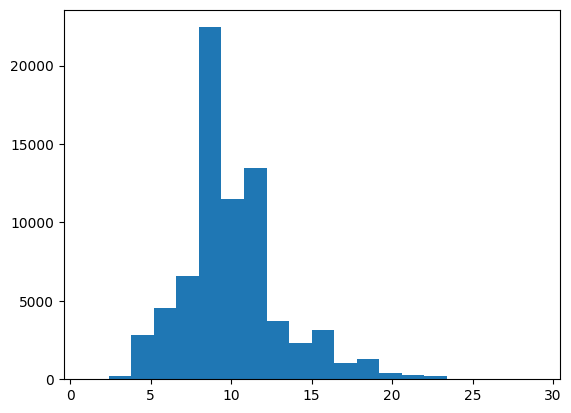

In [7]:
# Your code starts here
plt.hist(x=df1_processed['Age'],bins=20)
# Your code ends here

<Axes: xlabel='Age', ylabel='Density'>

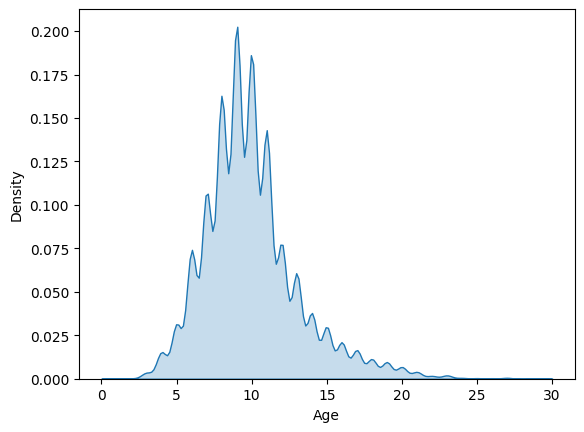

In [8]:
sns.kdeplot(df1_processed['Age'], fill=True)

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [9]:
# Your code starts here
X = df1_processed.drop(columns="Age",axis=1)
y = df1_processed["Age"]

# Your code ends here

In [10]:
y.isnull().sum()

np.int64(0)

In [11]:
# This code should print (74003, 11) and (74003, 1) if everything is correct
X.shape , y.shape


((74027, 11), (74027,))

In [12]:
#Print a few records of X
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,False,True,False


In [13]:
#Print a few records of y
y.head()

,Age
0,9
1,8
2,9
3,11
4,8


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [14]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [15]:
# Your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

# Your code ends here

array([[ 0.54755372,  0.58164377,  0.56502561, ...,  1.48946612,
        -0.68886276, -0.76221643],
       [-1.3672263 , -1.42269716, -0.93596463, ..., -0.6713815 ,
         1.45166797, -0.76221643],
       [-0.10521219,  0.05418563,  0.01921098, ..., -0.6713815 ,
        -0.68886276,  1.31196333],
       ...,
       [ 0.46051827,  0.58164377,  1.2472939 , ..., -0.6713815 ,
        -0.68886276,  1.31196333],
       [ 0.24292963,  0.26516889,  0.70147927, ..., -0.6713815 ,
         1.45166797, -0.76221643],
       [-0.32280083, -0.31503507, -0.25369634, ..., -0.6713815 ,
        -0.68886276,  1.31196333]])

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [16]:
# Your code starts here
x_train.shape , x_test.shape , y_train.shape , y_test.shape
# Your code ends here

((51818, 11), (22209, 11), (51818,), (22209,))

Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [17]:
# Add your import statement here
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Create an SVR object 'svr' by calling SVR()

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [18]:
# Your code starts here
svr_regressor.fit(x_train,y_train)

# Your code ends here

SVR()

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22201,) if everything is correct.

In [19]:
# Your code starts here
predictions = svr_regressor.predict(x_test)
print(predictions.shape)
print(type(predictions))

# Your code ends here

(22209,)
<class 'numpy.ndarray'>


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

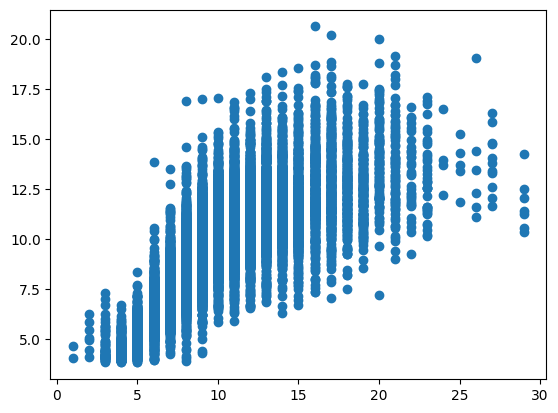

In [20]:
# Your code starts here
plt.scatter(x=y_test,y=predictions)
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [21]:
# Your code starts here
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

# Your code ends here

0.5622072416233959


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

An R² score of 0.54 means the model explains 54% of the variance in the target variable, leaving 46% unexplained. This indicates moderate performance—better than random guessing but far from ideal.




In [22]:
#Explore additional metrics here
from sklearn.metrics import mean_absolute_error
print(f'MAE: {mean_absolute_error(y_test,predictions)}')
# Mean Absolute Error

MAE: 1.377373208666669


In [23]:
# Calculate MSE
from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(y_test,predictions)}")

MSE: 4.4103468437069315


In [24]:

# Calculate RMSE
from sklearn.metrics import root_mean_squared_error
print(f"RMSE: {root_mean_squared_error(y_test,predictions)}")


RMSE: 2.1000825802112955


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

**1. XGBoost Regressor**

**How it works**: XGBoost is an ensemble method based on decision trees. It builds trees sequentially, where each tree corrects the errors of the previous ones, and uses gradient descent to minimize errors efficiently.

    Best scenario: Data is large and complex , There are non-linear relationships , want top accuracy and Dataset has:Mixed features,Outliers,Feature interactions


**2. Random Forest Regressor**

**How it works**: An ensemble method that constructs multiple decision trees during training. It combines their outputs averages them to improve prediction accuracy and control overfitting.

    Best scenario: good accuracy without heavy tuning , Data is: Medium to large size , Non-linear , want feature importance


**3. Ridge Regressor**

**How it works**: A type of linear regression that adds an L2 regularization term to the cost function, penalizing large coefficients to prevent overfitting.

    Best scenario: Relationship is mostly linear,Dataset has:Multicollinearity (highly correlated features),Small to medium size and want:Fast training,Easy interpretation

###Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [25]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample
x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

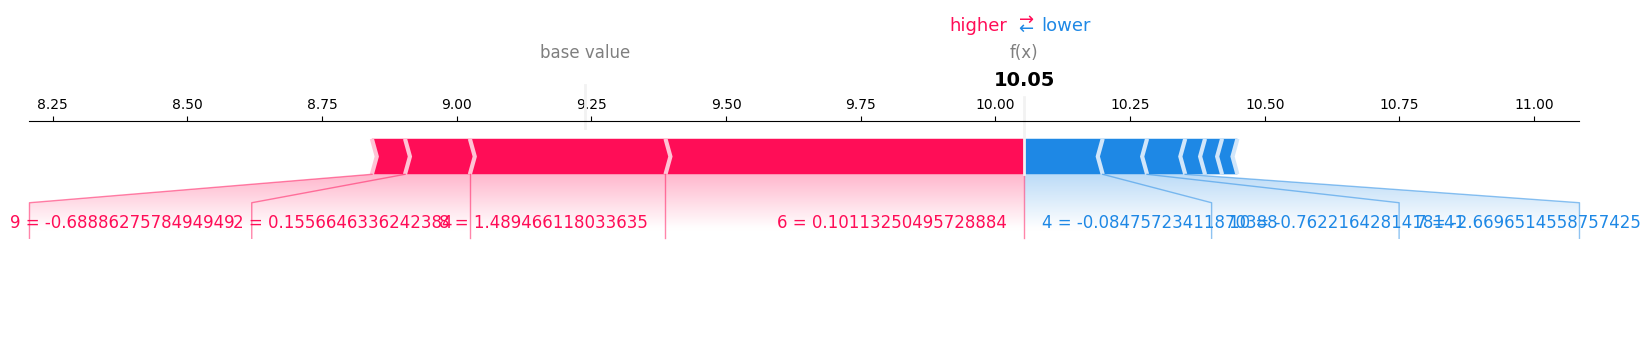

In [26]:
#Run this code as it is
ex = KernelExplainer(svr_regressor.predict, sample(x_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(x_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, x_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1LlLZM-DCdajm9-EakRLM7qJSYQghJZUW/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [46]:
df = pd.read_csv('/content/classified_data.txt',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [47]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [48]:
#describe()
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

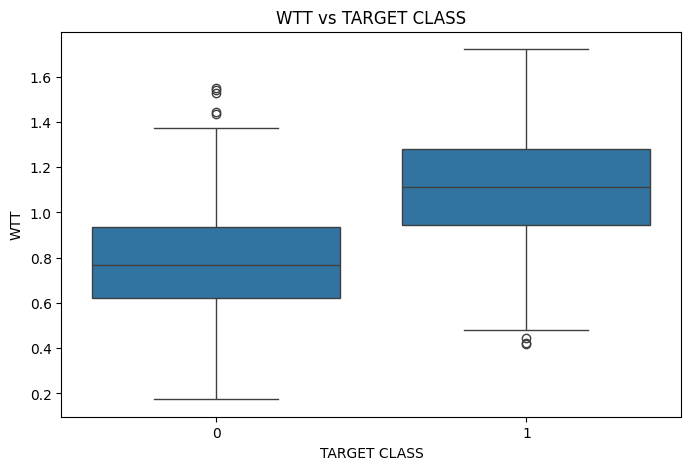

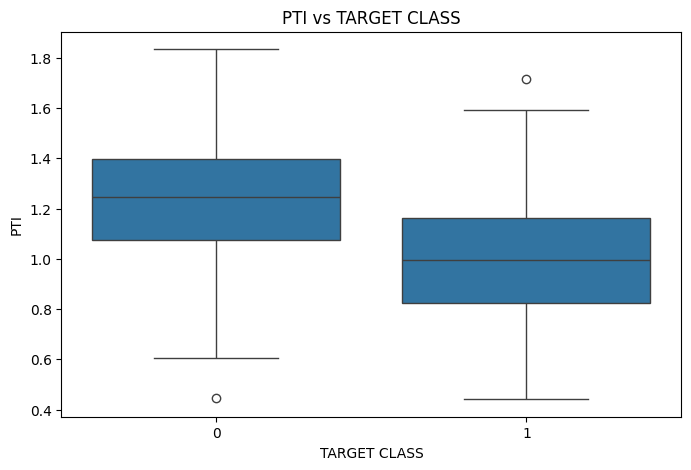

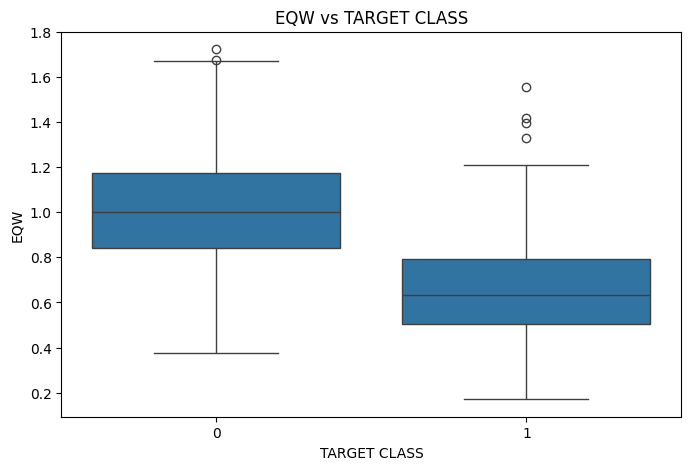

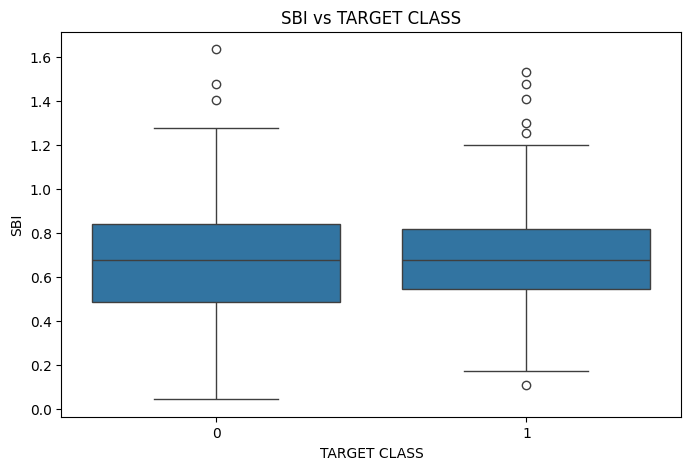

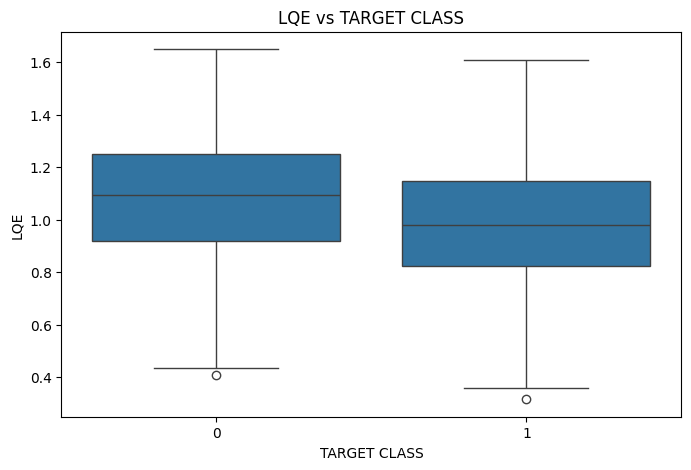

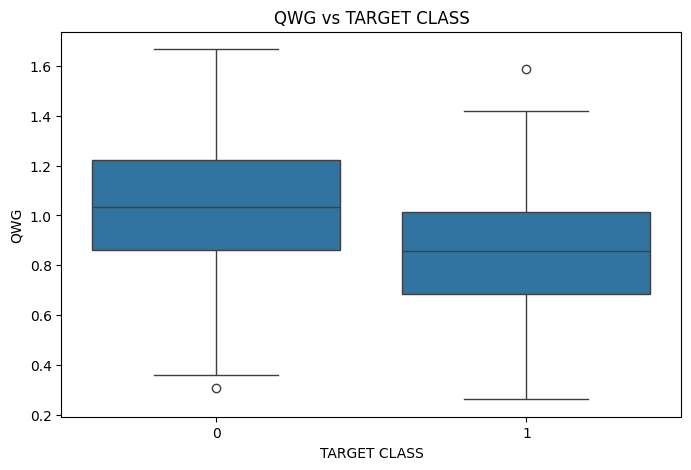

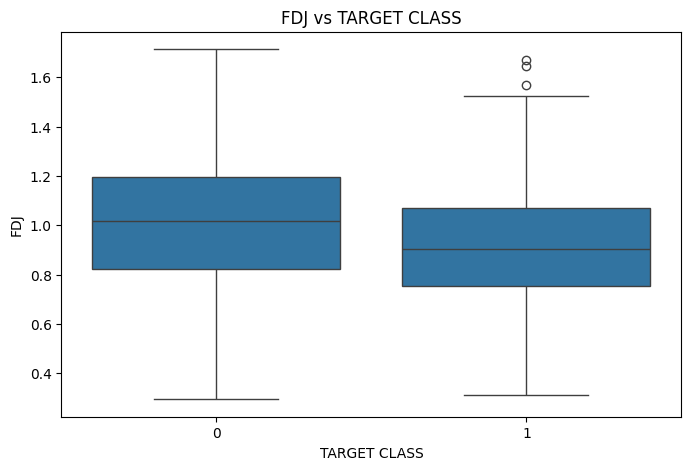

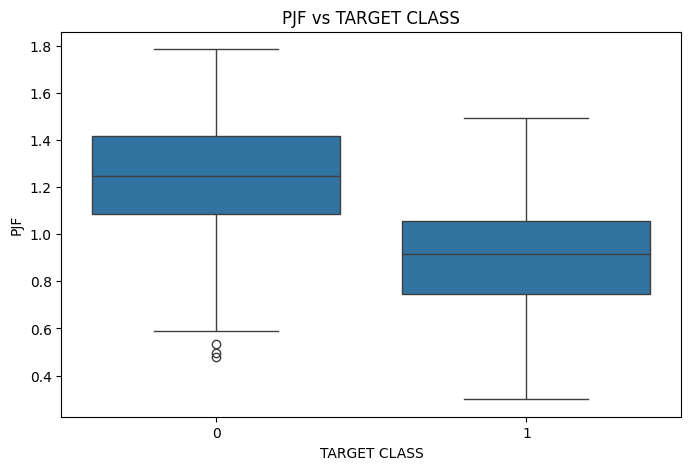

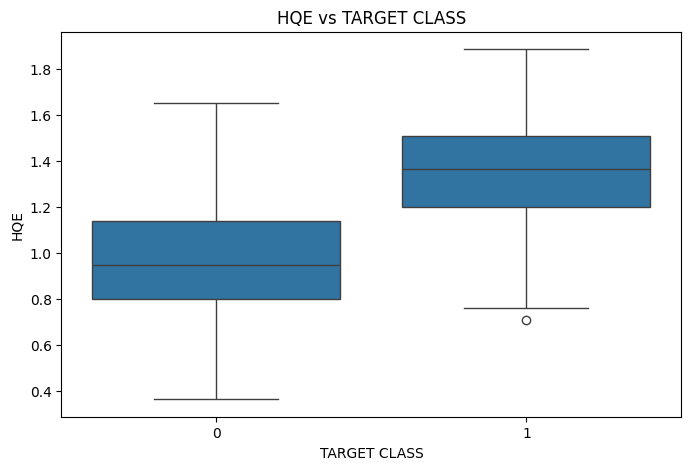

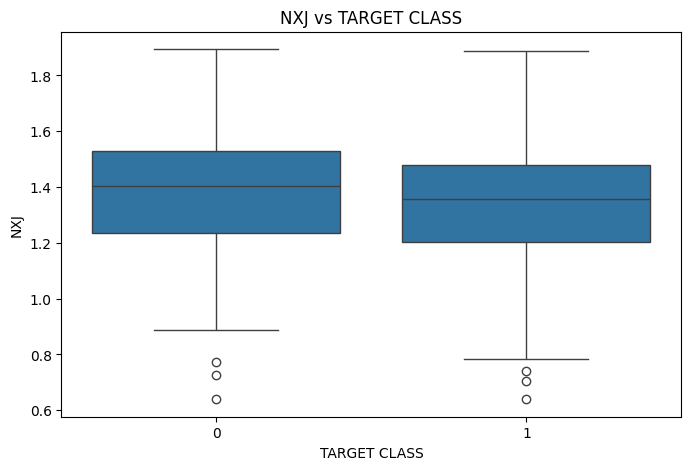

In [49]:
# your code starts here
columns = df.columns
for col in columns:
  if col!="TARGET CLASS":
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='TARGET CLASS', y=col, data=df)
    plt.title(f'{col} vs TARGET CLASS')
    plt.show()
# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

Text here

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [50]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [51]:
# your code starts here
y = df['TARGET CLASS']
df = df.drop(columns="TARGET CLASS",axis=1)
colmns = df.columns
df_feat = scaler.fit_transform(df)
df_feat = pd.DataFrame(df_feat,columns=colmns)
df_feat.head(15)
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
5,-0.399853,1.591707,0.928649,1.477102,0.308440,0.263270,1.239716,0.722608,-2.206816,0.809900
6,-0.017189,0.534949,0.826189,-1.723636,-0.147547,-2.010505,-0.206348,-1.096313,-0.158215,-1.233974
7,-0.461182,-0.100835,0.210071,-1.909291,-0.366695,0.396875,0.718122,0.934523,0.228458,0.308929
8,-0.598054,1.360189,-0.172618,-1.502292,-1.192485,0.504787,-0.325981,0.834346,-0.136536,-0.670199
9,-0.612806,-2.331876,0.197211,1.127356,1.636853,-0.225233,0.948308,-1.644881,1.309064,-1.865764


**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [33]:
# your code starts here

# your code ends here

### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [52]:
# Your code starts here.
X=df_feat
# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [53]:
# Your code starts here.
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [54]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train,y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [55]:
# Your code starts here.
pred = knn1.predict(x_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [57]:
# Your code starts here.
from sklearn.metrics import classification_report,accuracy_score
print(f'Classification report:\n{classification_report(y_test, pred)}')
# Your code ends here

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [59]:
# Your code starts here.
print(f'Accuracy : {accuracy_score(y_test, pred):.3f}')
# Your code ends here

Accuracy : 0.937


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [65]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
scores=[]
for i in range(1,61):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred1 = knn.predict(x_test)
  scores.append(accuracy_score(y_test,pred1))
max_k = scores.index(max(scores))+1
print(f'max accuracy corresponds to k :{max_k}')
# Your code starts here.
# Your code ends here

max accuracy corresponds to k :12


**Plot a graph of K value vs Accuracy**

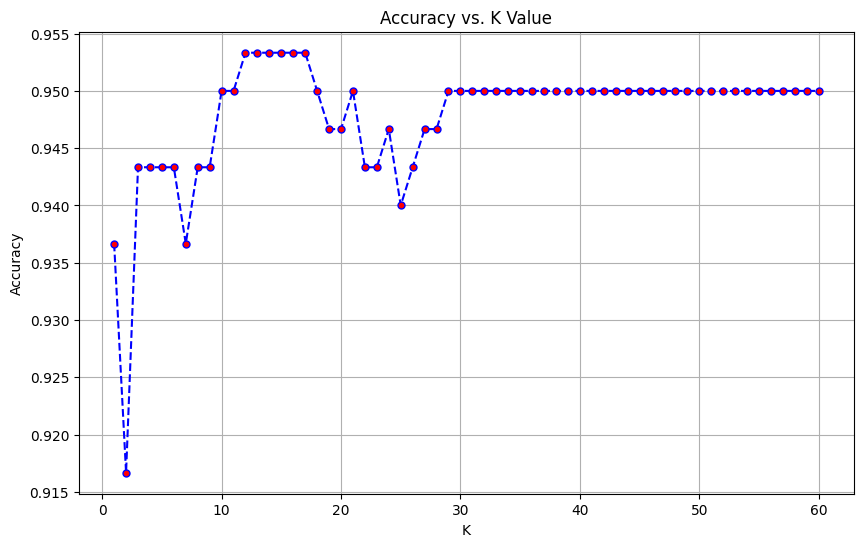

In [66]:
# Your code starts here.
plt.figure(figsize=(10,6))
plt.plot(range(1, 61), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [68]:
# Your code starts here.
print(f'max accuracy corresponds to k :{max_k}')
print(f'Max accuracy : {scores[max_k-1]:.3f}')
# Your code ends here

max accuracy corresponds to k :12
Max accuracy : 0.953


In [43]:
# Reasons: Obtained the max value of k using the loop above, wherein for each "i" knn model is fitted and score obtained which is appended to scores list
#          and after loop ends , found the max of scores and corresponding index +1 gives max k value.
#          max k value can also be found from the graph plotted above, where we can see that from k=12 to k=17 we have max accuracy then we can select
#          any one value from this range.

# **Compulsory:**

Task 1 : You have to research and create a short blog on the topic of **Reinforcement Learning**.


Task 2 : You have to research and create a short blog on the topic of **Oversampling and Undersampling**.
Happy coding! :)

TASK1:
Reinforcement Learning:
Reinforcement Learning is a machine learning paradigm where agents learn to make decisions by interacting with an environment and receiving feedback through rewards or penalties. Unlike in supervised learning, which requires labeled data, in RL, agents discover good strategies by trial and error, trying to maximize the cumulative reward over time.​

Key Terms

Agent: The learner making decisions.

Environment: The external system that the agent interacts with.

Action, State, Reward: An agent observes a state, executes an action, and obtains feedback in the form of a reward.

Policy: Strategy that maps states to actions.

Agents improve their policy based on the rewards they collect, hence enabling them to learn sophisticated behaviors over time even if rewards are delayed.​

How RL Differs

Supervised Learning: Learns from correct answers - labels.

Reinforcement Learning: Learning from feedback/rewards. Most of the time, no explicit "correct" answers, delayed signals ​

Notable Algorithms and Milestones

Q-learning is one of the most popular RL algorithms and helps agents estimate the expected value of actions in different states by updating knowledge through repeated interaction with the environment.

AlphaGo was developed by DeepMind, with RL-combined deep learning that defeated a world champion in the game of Go, propelling the field dramatically.

Real-World Applications

Autonomous vehicles: Navigation and control

Medical care: Treatment on an individual basis Robotics: Adaptive control and manipulation Finance: Algorithmic trading Supply chain: Warehouse and logistics optimization​ Takeaway Reinforcement learning allows AI systems to learn by doing, which makes it particularly important for applications where optimal long-term behavior should be learned, rather than directly programmed.



TASK2:
Oversampling and Undersampling: How to Fix Imbalanced Data in Machine Learning

In many real-world machine learning problems, such as fraud detection, medical diagnosis, or spam filtering, classes are not balanced. Often, one class (the majority) can dominate a dataset, and most predictions made by models will be for that class, while the rare but important minority class is ignored. To tackle this issue, there exist two simple yet powerful resampling techniques: oversampling and undersampling.

Oversampling increases the number of samples in a minority class. It can be performed by either simply duplicating existing minority examples at random or by generating synthetic ones, for instance, by SMOTE, which generates new points by interpolating between real minority samples. This is particularly useful when the dataset is small and missing minority cases would be very expensive; oversampling can, though, increase the risk of overfitting if duplicates or unrealistic synthetic samples dominate.​

Undersampling takes the opposite approach: it reduces the number of majority-class samples to match the minority class, typically through the random removal of majority examples. This is useful when the majority class is enormous and has many redundant samples since this quickens training and reduces storage and computation needs. However, undersampling risks discarding valuable data points and thus weakening the model if too much useful majority data are thrown away.​

Which to choose between oversampling and undersampling depends on the problem and the size of the data. If the dataset is small and the minority class is critical, oversampling is often preferred, mostly with techniques like SMOTE. If the dataset is very large and can afford losing some majority samples, undersampling can become efficient and effective. In practice, data scientists often combine both methods and always evaluate models with metrics like precision, recall, F1 score, and ROC-AUC instead of relying on raw accuracy, which can be misleading on imbalanced datasets.

# **End of Task**


